In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import tensorboard
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Flatten
from keras import optimizers,regularizers
from keras.optimizers import Lion
from keras import losses
from keras.losses import SparseCategoricalCrossentropy
from keras import metrics
from keras.optimizers import SGD, Adam
from keras.initializers import lecun_uniform

Завантаження датасету та підготовка даних

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


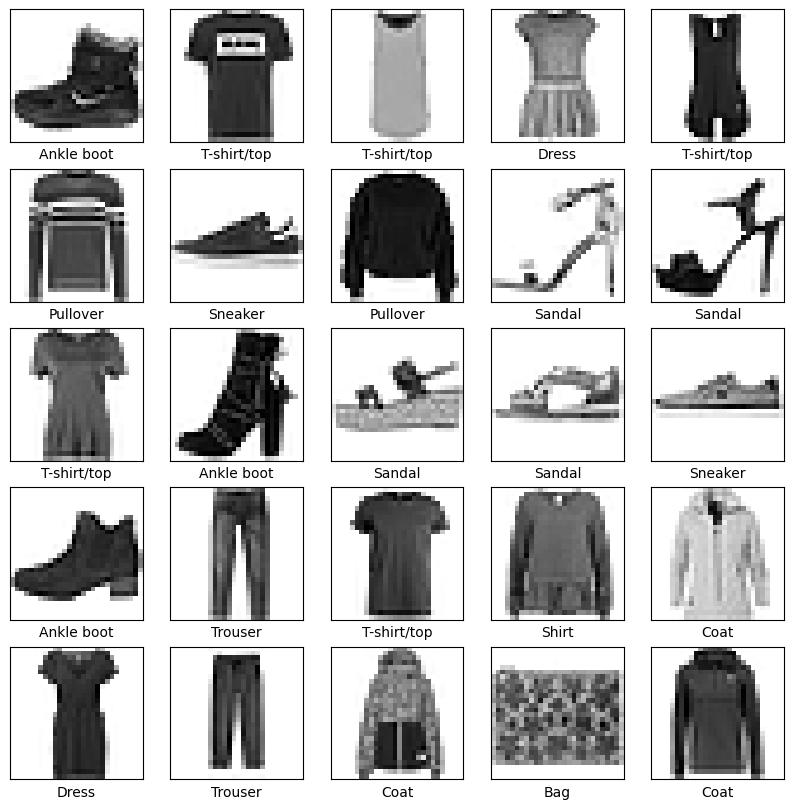

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


Model_1 - оптимальна за гіперпараметрами. що дають найвищу точність

In [6]:
model_1 = Sequential([
    Dense(800, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(500, activation='relu'),
    Dropout(0.3),
    Dense(400, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dropout (Dropout)           (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               400500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               200400    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                4

In [15]:
history = model_1.fit(x_train, y_train,
                    batch_size=400,
                    epochs=30,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/30
105/105 [==============================] - 8s 75ms/step - loss: 0.1871 - accuracy: 0.9287 - val_loss: 0.2778 - val_accuracy: 0.9062
Epoch 2/30
105/105 [==============================] - 9s 83ms/step - loss: 0.1865 - accuracy: 0.9294 - val_loss: 0.2706 - val_accuracy: 0.9083
Epoch 3/30
105/105 [==============================] - 7s 64ms/step - loss: 0.1822 - accuracy: 0.9295 - val_loss: 0.2682 - val_accuracy: 0.9088
Epoch 4/30
105/105 [==============================] - 8s 78ms/step - loss: 0.1832 - accuracy: 0.9290 - val_loss: 0.2748 - val_accuracy: 0.9080
Epoch 5/30
105/105 [==============================] - 7s 69ms/step - loss: 0.1867 - accuracy: 0.9280 - val_loss: 0.2832 - val_accuracy: 0.9069
Epoch 6/30
105/105 [==============================] - 9s 83ms/step - loss: 0.1822 - accuracy: 0.9296 - val_loss: 0.2808 - val_accuracy: 0.9063
Epoch 7/30
105/105 [==============================] - 9s 87ms/step - loss: 0.1797 - accuracy: 0.9313 - val_loss: 0.2878 - val_accuracy: 0.9046

313/313 [==============================] - 1s 4ms/step - loss: 0.3512 - accuracy: 0.8974
Test Accuracy: 89.74%


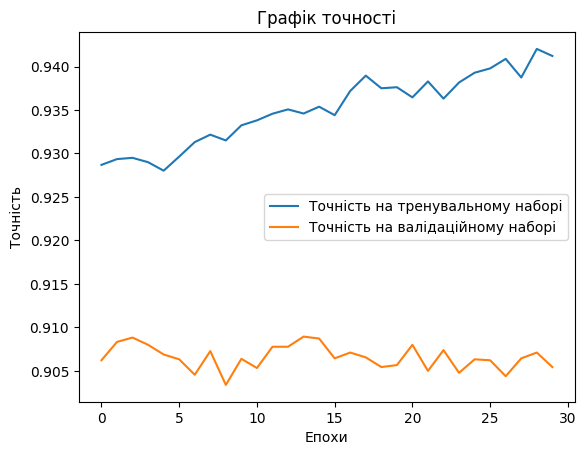

In [16]:
model_1.save('my_model_1.h5')

# Оцінка точності на тестових даних
test_loss, test_accuracy = model_1.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.title('Графік точності')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

In [17]:
results = model_1.evaluate(x_test, y_test)
print
(results)

313/313 [==============================] - 1s 4ms/step - loss: 0.3512 - accuracy: 0.8974


[0.351235032081604, 0.8974000215530396]

1/1 [==============================] - 0s 163ms/step


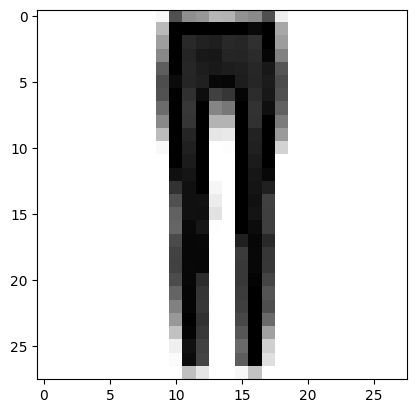

Модель передбачає: Trouser
Правильна відповідь: Trouser

1/1 [==============================] - 0s 20ms/step


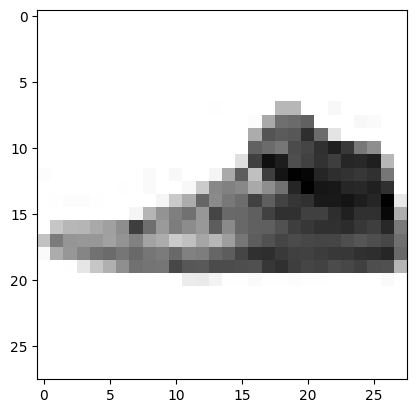

Модель передбачає: Sneaker
Правильна відповідь: Sneaker

1/1 [==============================] - 0s 20ms/step


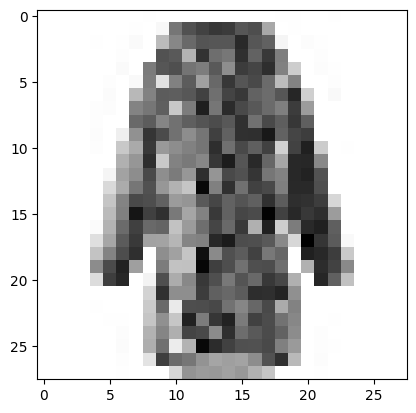

Модель передбачає: Coat
Правильна відповідь: Coat

1/1 [==============================] - 0s 19ms/step


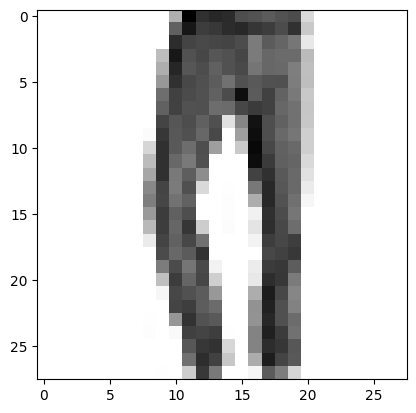

Модель передбачає: Trouser
Правильна відповідь: Trouser

1/1 [==============================] - 0s 19ms/step


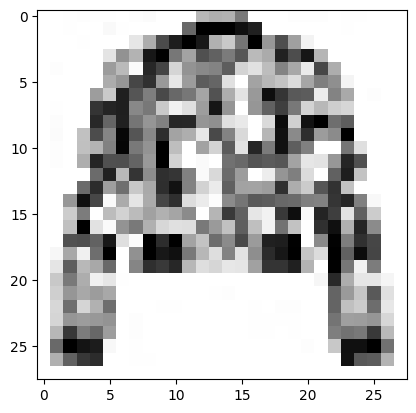

Модель передбачає: Coat
Правильна відповідь: Coat

1/1 [==============================] - 0s 20ms/step


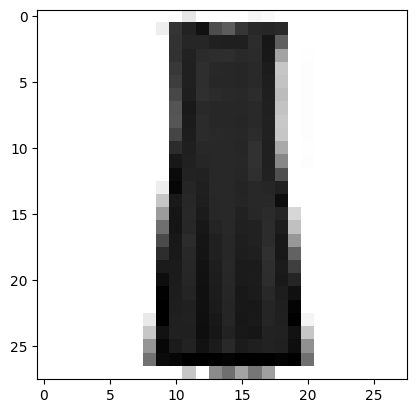

Модель передбачає: Dress
Правильна відповідь: Dress



In [18]:
random_indices = np.random.choice(x_test.shape[0], size=6, replace=False)
for idx in random_indices:
    test_image = x_test[idx].reshape(1, -1)
    prediction = model_1.predict(test_image)

    plt.imshow(x_test[idx].reshape(28, 28), cmap=plt.cm.binary)
    plt.show()

    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(y_test[idx])

    print(f"Модель передбачає: {class_names[predicted_class]}")
    print(f"Правильна відповідь: {class_names[actual_class]}\n")

Екпериментальні моделі з різними гіперпараметрами

Model_2, 3 шари та SGD-оптимізатор, 20 епох.

In [44]:
model_2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

model_2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 512)               401920    
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 128)               32896     
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 5674

In [45]:
history = model_2.fit(x_train, y_train,
                    batch_size=250,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
192/192 [==============================] - 5s 21ms/step - loss: 1.6495 - accuracy: 0.4563 - val_loss: 0.9792 - val_accuracy: 0.6811
Epoch 2/20
192/192 [==============================] - 3s 18ms/step - loss: 1.0057 - accuracy: 0.6503 - val_loss: 0.7615 - val_accuracy: 0.7372
Epoch 3/20
192/192 [==============================] - 3s 18ms/step - loss: 0.8402 - accuracy: 0.7035 - val_loss: 0.6785 - val_accuracy: 0.7629
Epoch 4/20
192/192 [==============================] - 5s 26ms/step - loss: 0.7615 - accuracy: 0.7325 - val_loss: 0.6269 - val_accuracy: 0.7828
Epoch 5/20
192/192 [==============================] - 3s 18ms/step - loss: 0.7082 - accuracy: 0.7521 - val_loss: 0.5928 - val_accuracy: 0.7962
Epoch 6/20
192/192 [==============================] - 3s 18ms/step - loss: 0.6708 - accuracy: 0.7618 - val_loss: 0.5681 - val_accuracy: 0.8034
Epoch 7/20
192/192 [==============================] - 5s 24ms/step - loss: 0.6358 - accuracy: 0.7767 - val_loss: 0.5467 - val_accuracy: 0.8101

In [47]:
results = model_2.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 4ms/step - loss: 0.4550 - accuracy: 0.8369
[0.4550075829029083, 0.836899995803833]


In [ ]:
model_2.save('my_model_2.h5')

Model 3

In [54]:
model_3 = Sequential([
    Dense(784, kernel_initializer=lecun_uniform(), activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(784, kernel_initializer=lecun_uniform(), activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
    ])

optimizer = SGD(learning_rate=0.1)

model_3.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model_3.fit(x_train, y_train,
            epochs=30,
            batch_size=120,
            validation_data=(x_test, y_test))

Epoch 1/30
500/500 [==============================] - 12s 23ms/step - loss: 0.6542 - accuracy: 0.7728 - val_loss: 0.4705 - val_accuracy: 0.8347
Epoch 2/30
500/500 [==============================] - 11s 23ms/step - loss: 0.4541 - accuracy: 0.8364 - val_loss: 0.4280 - val_accuracy: 0.8471
Epoch 3/30
500/500 [==============================] - 11s 23ms/step - loss: 0.4083 - accuracy: 0.8518 - val_loss: 0.3931 - val_accuracy: 0.8560
Epoch 4/30
500/500 [==============================] - 10s 20ms/step - loss: 0.3819 - accuracy: 0.8611 - val_loss: 0.3994 - val_accuracy: 0.8547
Epoch 5/30
500/500 [==============================] - 11s 23ms/step - loss: 0.3581 - accuracy: 0.8701 - val_loss: 0.3733 - val_accuracy: 0.8659
Epoch 6/30
500/500 [==============================] - 12s 23ms/step - loss: 0.3447 - accuracy: 0.8741 - val_loss: 0.3566 - val_accuracy: 0.8723
Epoch 7/30
500/500 [==============================] - 12s 23ms/step - loss: 0.3324 - accuracy: 0.8792 - val_loss: 0.3475 - val_accuracy:

In [55]:
model_3.save('my_model_3.h5')

results = model_3.evaluate(x_test, y_test)
print(results)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 6ms/step - loss: 0.3137 - accuracy: 0.8898
[0.31372228264808655, 0.8898000121116638]


Model_4 за прикладом з https://www.kaggle.com/code/jserna/hyperparameters-optimization-on-fashion-mnist/notebook, тільки з 2-ма епохами замість одної

In [57]:
(x_train_4, y_train_4), (x_test_4, y_test_4) = tf.keras.datasets.fashion_mnist.load_data()

x_train_4 = x_train_4.reshape(-1, 784) / 255.0
x_test_4 = x_test_4.reshape(-1, 784) / 255.0


y_train_4 = tf.keras.utils.to_categorical(y_train_4, 10)
y_test_4 = tf.keras.utils.to_categorical(y_test_4, 10)

# Створення моделі
model_4 = Sequential([
    Dense(784, activation='relu', input_shape=(784,), kernel_initializer=lecun_uniform()),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Компіляція моделі
sgd = SGD(learning_rate=0.1)
model_4.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Виведення інформації про модель
model_4.summary()

# Тренування моделі
history = model_4.fit(x_train_4, y_train_4, batch_size=20, epochs=2, validation_split=0.2, verbose=1)

# Оцінка моделі на тестових даних
test_loss, test_accuracy = model_4.evaluate(x_test_4, y_test_4, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 784)               615440    
                                                                 
 dropout_38 (Dropout)        (None, 784)               0         
                                                                 
 dense_68 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
2400/2400 [==============================] - 12s 5ms/step - loss: 0.5597 - accuracy: 0.7983 - val_loss: 0.4556 - val_accuracy: 0.8359
Epoch 2/2
2400/2400 [==============================] - 11s 5ms/step - loss: 0.4261 - accuracy: 0.8454 - val_loss: 0.4007 - val_accuracy: 

313/313 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8471
Test Accuracy: 84.71%


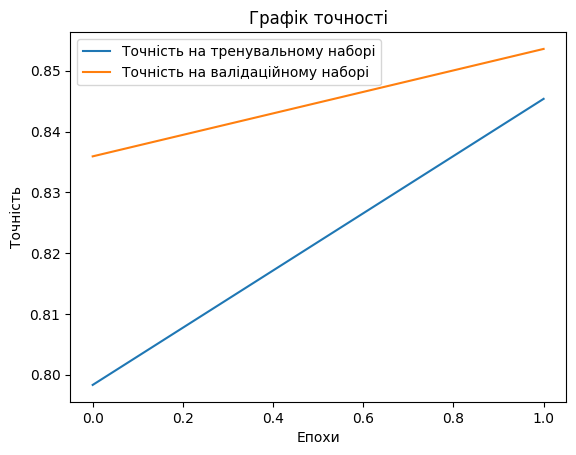

In [58]:
model_4.save('my_model_4.h5')

# Оцінка точності на тестових даних
test_loss, test_accuracy = model_4.evaluate(x_test_4, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.title('Графік точності')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()